# Overall
```
- 프로젝트명 : OTT 컨텐츠 선호도 분석
- 프로젝트유형 : 데이터 EDA 및 인사이트 도출
- 문제정의 : 컨텐츠와 유저 선호도 분석 통해 인사이트 도출
- 기대효과 :사용자 선호와 시청 패턴에 대한 이해도 바탕, 컨텐츠 관리 및 마케팅 전략 수립
- 해결방안 :
    - 메타데이터를 활용한 다차원적인 데이터 분석 수행
    - 사용자의 시청 기록과 프로파일 데이터를 분석하여 선호도 패턴 이해
    - 인구통계학적 데이터와 결합하여 시청자 기반의 시장 분석 수행
- 성과측정 :
    - 분석 결과의 인사이트가 컨텐츠 관련 의사결정에 얼마나 영향을 미치는지 평가
    - 데이터 기반 결정의 성과를 측정하기 위한 KPI 설정 (예: 컨텐츠 관람수, 사용자 확보 수, 구독 전환율 등)
- 운영방향 :
    - 정기적인 데이터 분석을 통한 시장 동향 및 사용자 선호의 변화 모니터링
    - 분석 결과를 컨텐츠 구매, 제작, 마케팅 전략에 실질적으로 적용
- 분석결과 :
    - 컨텐츠 유형 분포 (Distribution of Content Types): Movie 수는 TV Show 의 2배 이상, 제작 컨텐츠 종류는 Movie가 높은 편
    - 출시 연도 분포 (Distribution of Release Years): 14~15 년도 기점으로 연 600~800 작품 이상 제작, 더욱 치열해지고 있는 양상
    - 평점 분포 (Distribution of Ratings) : TV-MA, TV-14, TV-PG, R 등 성인 또는 14세 이상의 청소년 대상 컨텐츠가 다수를 이루는 양상, 해당 연령층을 대상으로 한 컨텐츠가 주를 이루는 양상
    - 콘텐츠 제작 국가 분포 (Top 20 Countries with Most Content) : US, India, UK 에서 대부분의 컨텐츠 제작이 이루어지고 있으며, JP, KR 이 그 뒤를 잇고 있음
    - 영화 시간 분포 (Distribution of Movie Durations) : 90~110 분 사이의 컨텐츠 분량이 주력
- Meta data
    - show_id : 각 영화/TV 쇼의 고유 ID  
    - type : 식별자 - 영화 또는 TV 쇼  
    - title : 영화 / TV 쇼의 제목  
    - director : 영화의 감독  
    - cast : 영화/쇼에 참여한 배우들  
    - country : 영화/쇼가 제작된 국가  
    - date_added : Netflix에 추가된 날짜  
    - release_year : 영화/쇼의 실제 출시 연도  
    - rating : 영화/쇼의 TV 평점  
    - duration : 총 시간 - 분 또는 시즌 수  

```

<!--
https://colab.research.google.com/drive/1iGsayD6HQfvGpgioQuipLY79KfYUk6f_
https://colab.research.google.com/drive/1uWkOBjhmbd2K-lLx6C3hr24URbRHBwLt
-->


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# pd.set option
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# 공학적 표기법 > 실수 옵션
pd.set_option('display.float_format', '{:.2f}'.format)

# Data read
df=pd.read_csv('S_PJT19_DATA.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **🔈Process01**  
**┗ Data Info Check**  
---

In [6]:
# Data 형태 확인
# 7,787 row, 12 col로 구성됨
print('df', df.shape)

df (7787, 12)


In [7]:
# Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### - Missing value imputation
---

In [30]:
# Null 값 확인
# 정보 누락, 불분명 등의 사유로 데이터 상 na값을 갖는 사항들이 존재할 수 있음을 가정하여 별도의 na 전처리를 미진행하겠습니다.
print(df.isnull().sum() / len(df))

show_id        0.00
type           0.00
title          0.00
director       0.31
cast           0.09
country        0.07
date_added     0.00
release_year   0.00
rating         0.00
duration       0.00
listed_in      0.00
description    0.00
duration_num   0.00
dtype: float64


In [31]:
df[df['director'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.00
11,s12,TV Show,1983,NaN,"Robert Więckiewicz, Maciej Musiał, Michalina O...","Poland, United States",2018-11-30,2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","In this dark alt-history thriller, a naïve law...",1.00
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",1.00
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,2017,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th...",87.00
24,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,NaN,"Bryson Baugus, Emily Neves, Blake Shepard, Pat...",Japan,2020-01-23,2020,TV-14,2 Seasons,"Anime Series, International TV Shows",Seiya and the Knights of the Zodiac rise again...,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7775,s7776,TV Show,Zoids Wild,NaN,"Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...",Japan,2020-08-14,2018,TV-Y7,1 Season,"Anime Series, Kids' TV",A quest for freedom and legendary treasure beg...,1.00
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.00
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,2019-11-26,2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...,1.00
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",44.00


In [32]:
df[df['cast'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
12,s13,TV Show,1994,Diego Enrique Osorno,NaN,Mexico,2019-05-17,2019,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",Archival video and new interviews examine Mexi...,1.00
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,2016-06-30,2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,84.00
26,s27,TV Show,(Un)Well,NaN,NaN,United States,2020-08-12,2020,TV-MA,1 Season,Reality TV,This docuseries takes a deep dive into the luc...,1.00
30,s31,Movie,#cats_the_mewvie,Michael Margolis,NaN,Canada,2020-02-05,2020,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,90.00
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,2016-12-01,2016,TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,56.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,s7680,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,2017-03-31,1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45.00
7686,s7687,Movie,XV: Beyond the Tryline,Pierre Deschamps,NaN,United Kingdom,2020-03-18,2016,TV-14,91 min,"Documentaries, Sports Movies","Set against the 2015 Rugby World Cup, this doc...",91.00
7766,s7767,TV Show,Zig & Sharko,NaN,NaN,France,2017-12-01,2016,TV-Y7,1 Season,"Kids' TV, TV Comedies","Zig, an island-bound hyena, will do anything t...",1.00
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.00


In [33]:
df[df['country'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
16,s17,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,2019-03-20,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h...",1.00
38,s39,TV Show,แผนร้ายนายเจ้าเล่ห์,NaN,"Chutavuth Pattarakampol, Sheranut Yusananda, N...",NaN,2019-03-30,2016,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...","When two brothers fall for two sisters, they q...",1.00
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,37.00
97,s98,Movie,3 Deewarein,Nagesh Kukunoor,"Naseeruddin Shah, Jackie Shroff, Juhi Chawla, ...",NaN,2019-12-31,2003,TV-MA,121 min,"Dramas, International Movies, Thrillers",A reporter interviews three convicts on death ...,121.00
117,s118,Movie,5 Cowok Jagoan,Anggy Umbara,"Ario Bayu, Arifin Putra, Dwi Sasono, Muhadkly ...",NaN,2019-01-05,2017,TV-MA,106 min,"Action & Adventure, Comedies, International Mo...",Yanto asks his friends to help save a girlfrie...,106.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7739,s7740,Movie,Your Excellency,Funke Akindele,"Akin Lewis, Funke Akindele, Kemi Lala Akindoju...",NaN,2020-07-10,2019,TV-G,120 min,"Comedies, International Movies","Bumbling through politics, a billionaire busin...",120.00
7746,s7747,TV Show,دفعة القاهرة,NaN,"Bashar al-Shatti, Fatima Al Safi, Maram Baloch...",NaN,2020-04-25,2019,TV-14,1 Season,"International TV Shows, TV Dramas",A group of women leaves Kuwait to attend unive...,1.00
7765,s7766,Movie,Zero Hour,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,2019-12-13,2018,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",89.00
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2.00


In [9]:
df.nunique()

,0
show_id,7787
type,2
title,7787
director,4049
cast,6831
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [10]:
# Outlier 확인
df.describe()

,release_year
count,7787.00
mean,2013.93
std,8.76
min,1925.00
25%,2013.00
50%,2017.00
75%,2018.00
max,2021.00


In [11]:
df.describe(include = 'O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,14,216,492,7769
top,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,2863,1608,334,3


In [34]:
# shape
df.shape

(7787, 13)

## **🔉Process02**  
**┗ 데이터 EDA**  
---

### - 시각화 및 탐색
---

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
# isin은 정확하게 일치하는 걸 찾을 때
# df['duration'].isin(['Seasons'])

# contains는 포함 문자열을 파악할 때
df[df['duration'].str.contains('Seasons', na = False)].shape, df[df['duration'].str.contains('min', na = False)].shape
# 시즌제로 기입된 802 작품
# min 단위 기입된 5377 작품

((802, 12), (5377, 12))

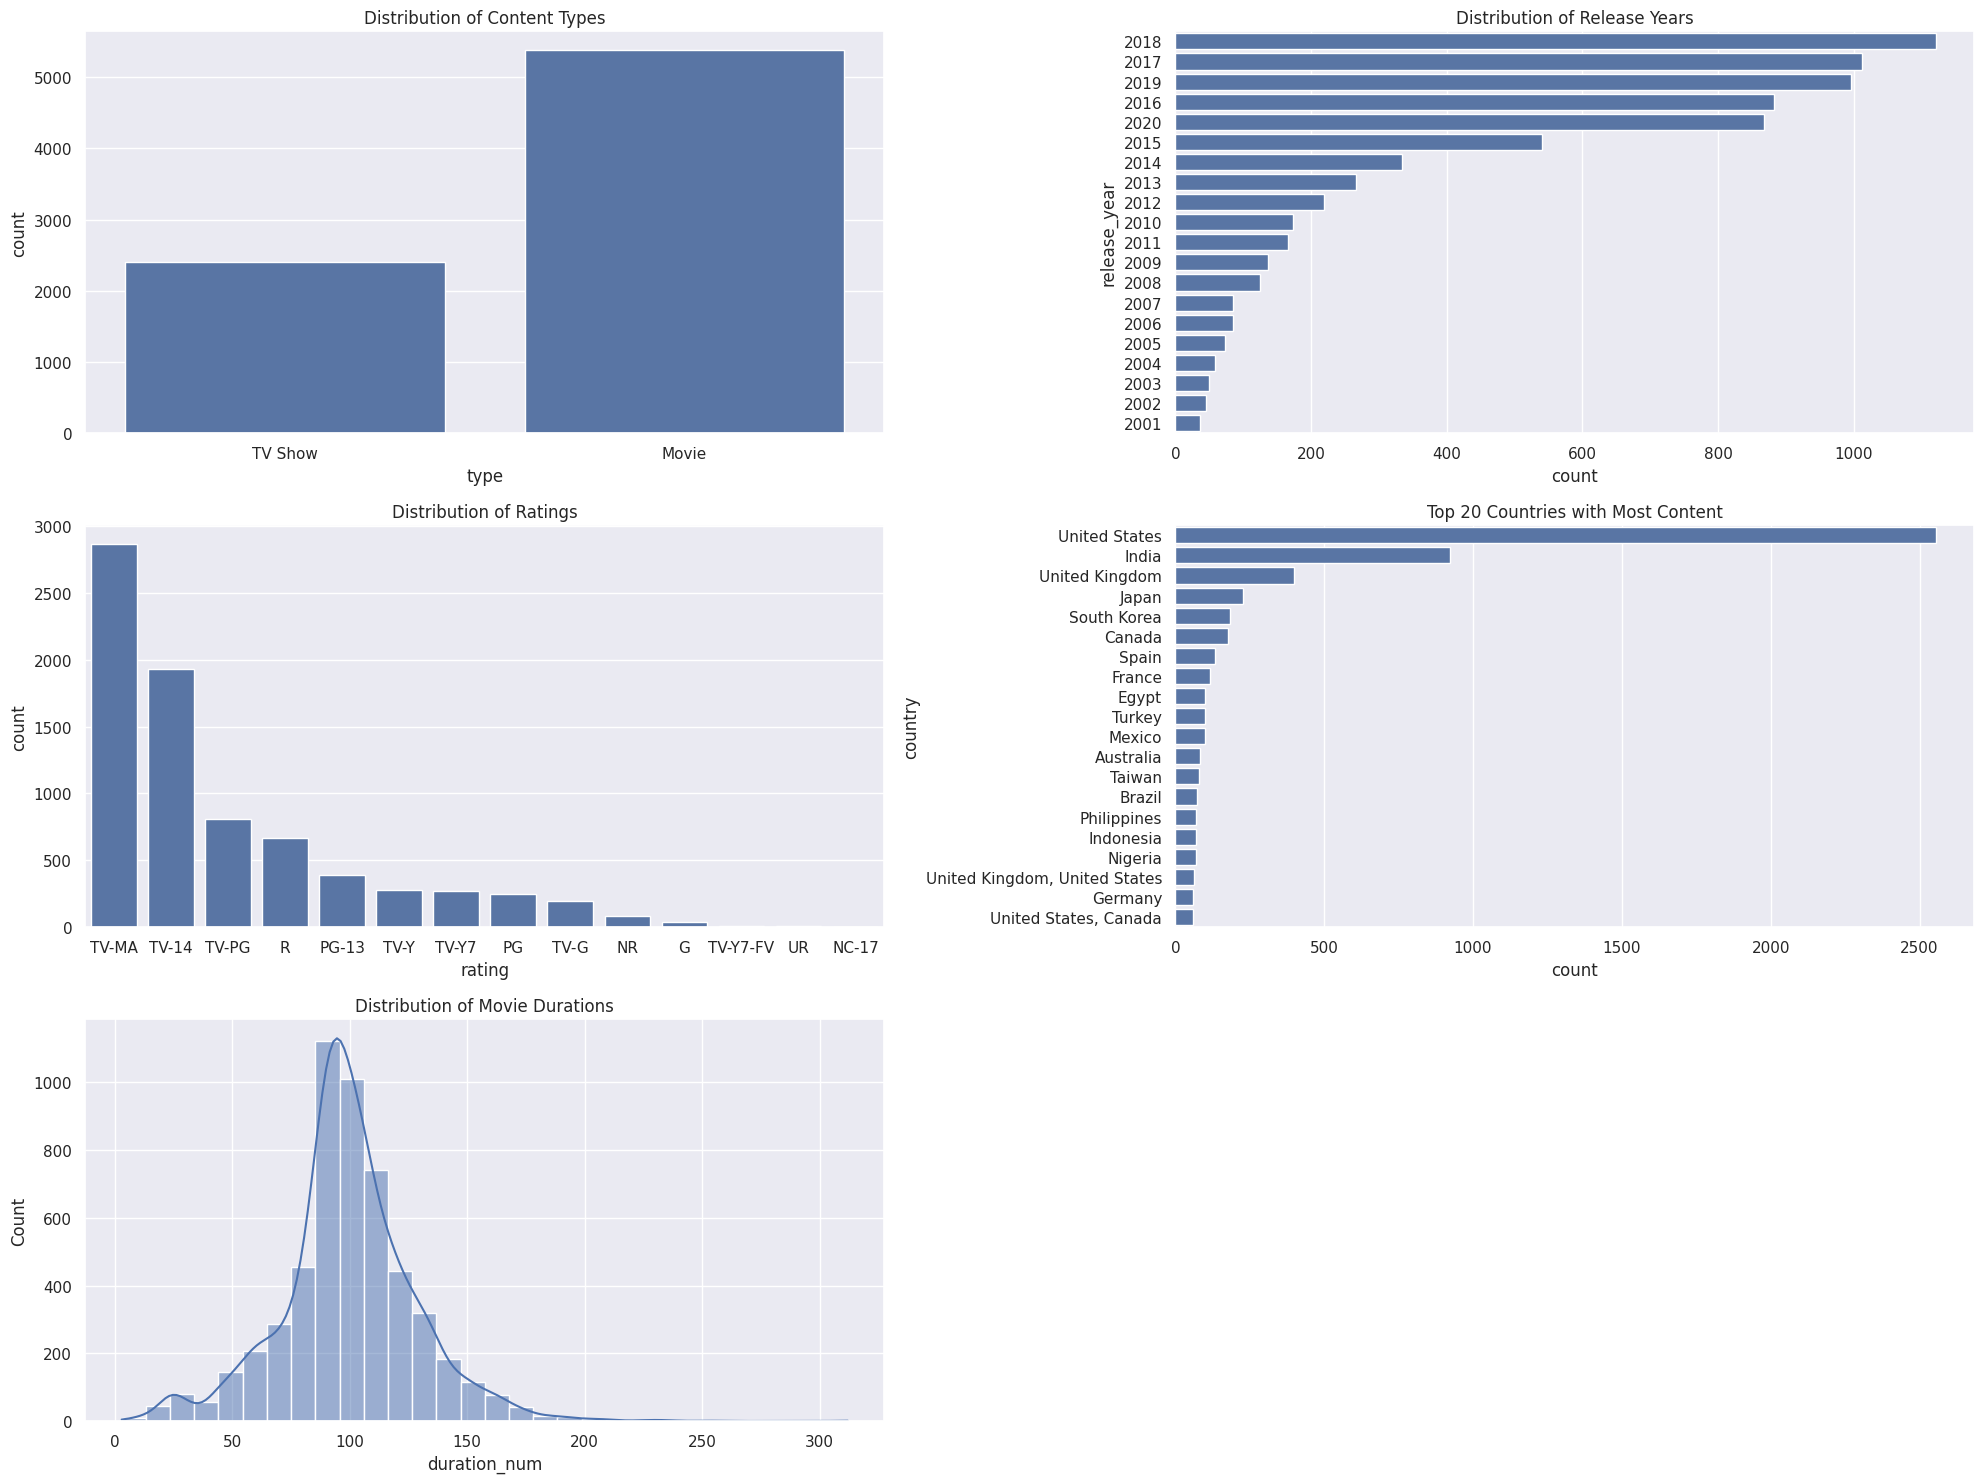

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

# 설정: Seaborn
sns.set(style="darkgrid")

# 데이터 프레임에서 'duration'의 숫자만 추출하기 위해 필요한 작업
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

#  시각화를 위한 그래프 크기 설정
plt.figure(figsize=(20, 15))

# type
plt.subplot(3, 2, 1)
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Types')

# release_year 분포
plt.subplot(3, 2, 2)
sns.countplot(data=df, y='release_year', order=df['release_year'].value_counts().index[:20])
plt.title('Distribution of Release Years')

# rating 분포
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')

# country 분포 (상위 20개)
plt.subplot(3, 2, 4)
top_countries = df['country'].value_counts().index[:20]
sns.countplot(data=df, y='country', order=top_countries)
plt.title('Top 20 Countries with Most Content')

# duration 분포 (영화만)
plt.subplot(3, 2, 5)
sns.histplot(data=df[df['type'] == 'Movie'], x='duration_num', bins=30, kde=True)
plt.title('Distribution of Movie Durations')

# 그래프 보여주기
plt.tight_layout()
plt.show()

## **🔊Process03**  
**┗ 전략수립**  
---



### - 장르별 컨텐츠 분석
---

In [16]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.00
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.00
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.00
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.00
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.00


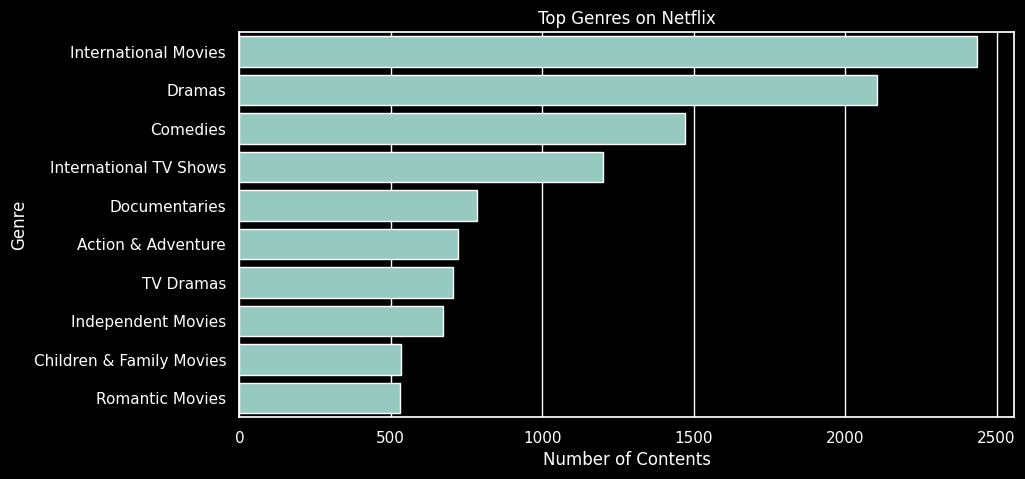

In [17]:
from collections import Counter
plt.style.use('dark_background')

# 장르별 컨텐츠 분석을 위해 'listed_in' 열에서 각 장르를 분리하고 카운트합니다.
genre_counts = Counter()
df['listed_in'].str.split(', ').apply(genre_counts.update)

# 가장 많이 등장하는 장르 상위 10개를 추출합니다.
# most_common() 메서드
top_genres = genre_counts.most_common(10)

# 장르별 컨텐츠 시각화
plt.figure(figsize=(10, 5))
genres = pd.DataFrame(top_genres, columns=['Genre', 'Count'])
sns.barplot(x='Count', y='Genre', data=genres)
plt.title('Top Genres on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Genre')
plt.show()

# 가장 인기 있는 장르는 'International Movies'와 'Dramas'

### - 국가별 컨텐츠 분석
---

In [18]:
# 국가별 컨텐츠 분석을 위한 준비: 'country' 열을 분리하고 카운트합니다.
country_counts = Counter() # 객체를 만들고
df['country'].dropna().str.split(', ').apply(country_counts.update)  # 결측치 제거 후, Counter 객체에 업데이트

# 가장 많은 컨텐츠를 생산한 국가 상위 10개를 추출합니다.
top_countries = country_counts.most_common(10)

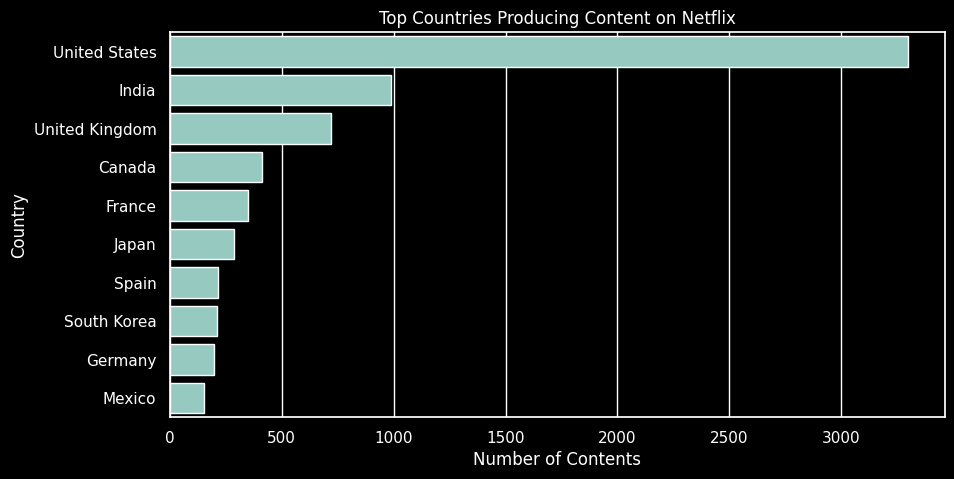

In [19]:
# 국가별 컨텐츠 시각화
plt.figure(figsize=(10, 5))
countries = pd.DataFrame(top_countries, columns=['Country', 'Count'])
sns.barplot(x='Count', y='Country', data=countries)
plt.title('Top Countries Producing Content on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Country')
plt.show()

# 미국이 가장 많은 컨텐츠를 생산한 국가로 나타나며, 인도와 영국이 그 뒤를 이었습니다.

### - 시청자 선호도 분석
---

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.00
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.00
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.00
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.00
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.00


In [21]:
# 시청자 선호도 분석을 위한 준비: 'rating' 열의 분포를 조사합니다.
rating_counts = df['rating'].value_counts()

# 출시 연도와 컨텐츠 인기도의 관계 분석을 위한 준비: 'release_year' 별 컨텐츠 수를 계산합니다.
release_year_counts = df['release_year'].value_counts().sort_index()

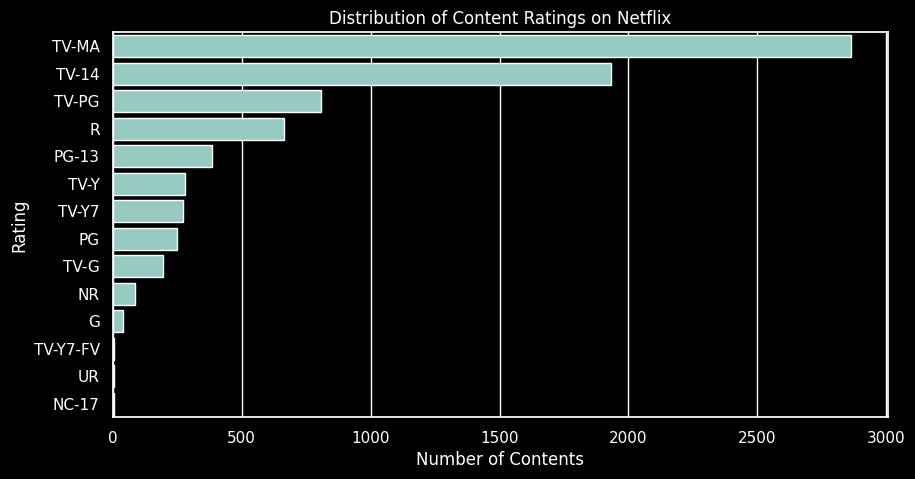

In [22]:
# 시청자 선호도 분석을 위한 준비: 'rating' 열의 분포를 조사합니다.
rating_counts = df['rating'].value_counts()

# 시청자 선호도(등급별) 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=rating_counts.values, y=rating_counts.index)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Number of Contents')
plt.ylabel('Rating')
plt.show()

# 가장 많은 컨텐츠는 'TV-MA' (성인 대상) 등급이며, 'TV-14' (14세 이상 대상) 등급이 그 뒤를 잇습니다. 이는 넷플릭스가 성인 시청자를 주요 타겟으로 하고 있음을 암시합니다.

### - 컨텐츠 업데이트 패턴 분석
---

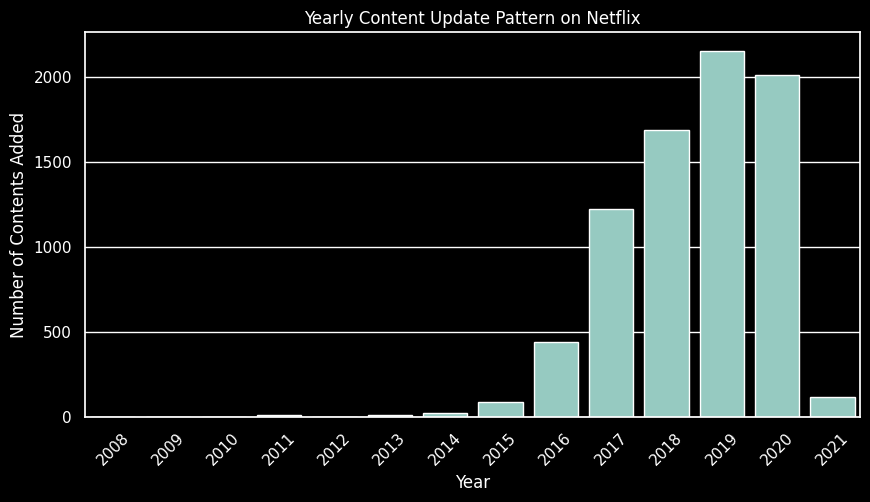

In [23]:
#▶  컨텐츠 업데이트 패턴 분석을 위한 준비: 'date_added' 열을 datetime으로 변환하고 연도별, 월별로 분석합니다.
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format =  "%B %d, %Y", errors='coerce')
content_update_by_year = df['date_added'].dt.year.value_counts().sort_index()
content_update_by_year.index = content_update_by_year.index.astype(int)
content_update_by_month = df['date_added'].dt.month_name().value_counts()

# 출시 연도별 컨텐츠 시각화
# 연도별 컨텐츠 업데이트 패턴 시각화
plt.figure(figsize=(10, 5))
sns.barplot(x=content_update_by_year.index, y=content_update_by_year.values)
plt.title('Yearly Content Update Pattern on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Contents Added')
plt.xticks(rotation=45)
plt.show()

# 넷플릭스는 2016년 이후로 매년 더 많은 컨텐츠를 추가하고 있으며, 2019년에 가장 많은 컨텐츠를 추가했습니다. 월별로는 12월에 가장 많은 컨텐츠가 추가되는 경향이 있고, 10월과 1월에도 상대적으로 많은 컨텐츠가 추가됩니다.

In [24]:
df['date_added'].isna().sum() # 10건의 결측치 발생
#df[df['date_added'].isna()]

np.int64(10)

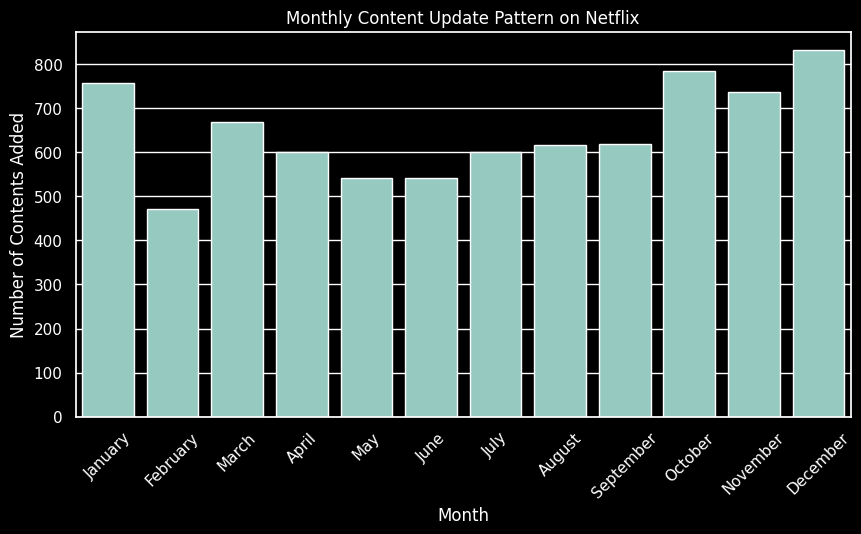

In [25]:
# 월별 컨텐츠 업데이트 패턴 시각화
plt.figure(figsize=(10, 5))
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
sns.barplot(x=content_update_by_month.index, y=content_update_by_month.values, order=months_order)
plt.title('Monthly Content Update Pattern on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Contents Added')
plt.xticks(rotation=45)
plt.show()

# 12월에 가장 많은 컨텐츠가 추가되었으며, 특히 연말에 컨텐츠 추가가 집중되는 경향이 있는 것으로 보입니다. 이는 연말 시즌에 맞춘 콘텐츠 업데이트 전략을 반영할 수 있습니다.